In [1]:
import numpy as np
import math
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops

%matplotlib inline

In [2]:
X_data = np.load('X.npy')
Y_data = np.load('Y.npy')
#Forgot from where this data was downloaded. Y_data is not as per one_hot
print(np.shape(X_data))
print(np.shape(Y_data))

(2062, 64, 64)
(2062, 10)


(2062, 64, 64)
(64, 64)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(2062, 10)


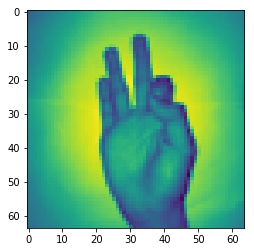

In [3]:
index = 6
print(np.shape(X_data))
print(np.shape(X_data[index]))
#print(np.shape(Y_data))
print(Y_data[index])
print(np.shape(Y_data))

#print ("y = " + str(np.squeeze(Y_data[:, index])))
#A = np.transpose(Y_data[index])
#print(A)
#print ("y = " + str(np.squeeze(A)))
#print(np.shape(np.squeeze(A[:, index])))
plt.imshow(X_data[index])
#print(X_data[index])

In [4]:
#Just a trial for one_hot conversion
indices = [0, 1, 2]
depth = 3
tf.one_hot(indices, depth)
index = tf.argmax(tf.one_hot(indices, depth), axis = 0)
print(index)

Tensor("ArgMax:0", shape=(3,), dtype=int64)


(100, 100, 3)
[[[133 133 135]
  [131 131 133]
  [134 134 136]
  ...
  [132 126 126]
  [130 124 124]
  [129 123 123]]

 [[134 134 136]
  [133 133 135]
  [135 135 137]
  ...
  [133 127 127]
  [131 125 125]
  [130 124 124]]

 [[135 135 137]
  [136 136 138]
  [136 136 138]
  ...
  [133 129 128]
  [131 127 126]
  [130 126 125]]

 ...

 [[117 117 117]
  [118 118 118]
  [120 120 120]
  ...
  [112 109 104]
  [114 111 106]
  [116 113 108]]

 [[115 115 115]
  [115 115 115]
  [117 117 117]
  ...
  [117 114 109]
  [117 114 109]
  [117 114 109]]

 [[113 113 113]
  [114 114 114]
  [115 115 115]
  ...
  [120 117 112]
  [117 114 109]
  [116 113 108]]]


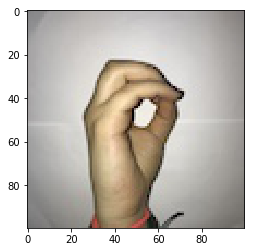

In [5]:
import matplotlib.image as mpimg

#image = plt.imread("path/to/Home/Downloads/DATA_MASTER/Dataset/0/5991.IMG")
image = plt.imread("IMG_5991.JPG")
print(image.shape)
print(image)
plt.imshow(image)
#This is possible since IMG_5991.JPG has been uploaded as an idividual image


In [1]:
from PIL import Image
import numpy as np
import os.path

# os.path is very vital
    

In [7]:
# Uploaded image files as .zip file
# We are extracting images from zip file '9_zp' to a directory named 'dir_9' and images goes to 
# folder '9' under 'dir_9'

import zipfile as zf

files_0 = zf.ZipFile('0_zp.zip', 'r')
files_1 = zf.ZipFile('1_zp.zip', 'r')
files_2 = zf.ZipFile('2_zp.zip', 'r')
files_3 = zf.ZipFile('3_zp.zip', 'r')
files_4 = zf.ZipFile('4_zp.zip', 'r')
files_5 = zf.ZipFile('5_zp.zip', 'r')
files_6 = zf.ZipFile('6_zp.zip', 'r')
# files_7 = zf.ZipFile('7_zp.zip', 'r')
files_8 = zf.ZipFile('8_zp.zip', 'r')
files_9 = zf.ZipFile('9_zp.zip', 'r')


files_0.extractall('dir_0')
files_1.extractall('dir_1')
files_2.extractall('dir_2')
files_3.extractall('dir_3')
files_4.extractall('dir_4')
files_5.extractall('dir_5')
files_6.extractall('dir_6')
# files_7.extractall('dir_7')
files_8.extractall('dir_8')
files_9.extractall('dir_9')

files_0.close()
files_1.close()
files_2.close()
files_3.close()
files_4.close()
files_5.close()
files_6.close()
# files_7.close()
files_8.close()
files_9.close()

In [8]:
# A module for creating datasets from reading images from folder'9' under 'dir_9'

import matplotlib.image as mpimg

def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = mpimg.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    images_size = np.shape(images)        
    return images_size, images


(205, 100, 100, 3)
(206, 100, 100, 3)
(206, 100, 100, 3)
(206, 100, 100, 3)
(207, 100, 100, 3)
(207, 100, 100, 3)
(207, 100, 100, 3)
(208, 100, 100, 3)
(204, 100, 100, 3)
(1856, 100, 100, 3)
[205 206 206 206 207 207 207 208 204]
9


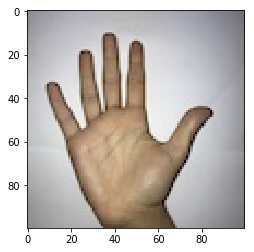

In [9]:
# Creating all datasets, folder-wise and then merging to create single dataset of all images

images_size_0, images_0 = load_images("dir_0/0")
images_size_1, images_1 = load_images("dir_1/1")
images_size_2, images_2 = load_images("dir_2/2")
images_size_3, images_3 = load_images("dir_3/3")
images_size_4, images_4 = load_images("dir_4/4")
images_size_5, images_5 = load_images("dir_5/5")
images_size_6, images_6 = load_images("dir_6/6")
# images_size_7, images_7 = load_images("dir_7/7")
images_size_8, images_8 = load_images("dir_8/8")
images_size_9, images_9 = load_images("dir_9/9")

digit_quan = np.array([images_size_0[0], images_size_1[0], images_size_2[0], images_size_3[0], images_size_4[0], images_size_5[0], images_size_6[0], images_size_8[0], images_size_9[0]])

images_all = np.vstack((images_0, images_1, images_2, images_3, images_4, images_5, images_6, images_8, images_9))

images_all_size = np.shape(images_all)

# Checking all the shapes

print(images_size_0)
print(images_size_1)
print(images_size_2)
print(images_size_3)
print(images_size_4)
print(images_size_5)
print(images_size_6)
# print(images_size_7)
print(images_size_8)
print(images_size_9)

print(images_all_size)
print(digit_quan)
print(len(digit_quan))

# See the images

Index = 1030
plt.imshow(images_all[Index])

In [10]:
def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    
    ### START CODE HERE ###
    
    # Create a tf.constant equal to C (depth), name it 'C'. (approx. 1 line)
    C = tf.constant(C, name='C')
    
    # Use tf.one_hot, be careful with the axis (approx. 1 line)
    one_hot_matrix = tf.one_hot(indices=labels, depth=C, axis=0)
    
    # Create the session (approx. 1 line)
    sess = tf.Session()
    
    # Run the session (approx. 1 line)
    one_hot = sess.run(one_hot_matrix)
    
    # Close the session (approx. 1 line). See method 1 above.
    sess.close()
    
    ### END CODE HERE ###
    
    return one_hot

In [11]:
# Creating Y data  

C = 6

one_hot = one_hot_matrix(np.arange(C), C)

print(one_hot[0])
print(np.shape(one_hot))


[1. 0. 0. 0. 0. 0.]
(6, 6)


In [12]:
# label data for '0':

def label_data_find(digit_quan, one_hot):
    
    label_data_0 = []
    for i in range(digit_quan[0]):
        label_start_0 = one_hot[0]
        label_data_0.append(label_start_0)
        
    label_data_1 = []
    for i in range(digit_quan[1]):
        label_start_1 = one_hot[1]
        label_data_1.append(label_start_1)
        
    label_data_2 = []
    for i in range(digit_quan[2]):
        label_start_2 = one_hot[2]
        label_data_2.append(label_start_2)
        
    label_data_3 = []
    for i in range(digit_quan[3]):
        label_start_3 = one_hot[3]
        label_data_3.append(label_start_3)
        
    label_data_4 = []
    for i in range(digit_quan[4]):
        label_start_4 = one_hot[4]
        label_data_4.append(label_start_4)
        
    label_data_5 = []
    for i in range(digit_quan[5]):
        label_start_5 = one_hot[5]
        label_data_5.append(label_start_5)
        
    label_data_6 = []
    for i in range(digit_quan[6]):
        label_start_6 = one_hot[3]
        label_data_6.append(label_start_6)
        
    label_data_8 = []
    for i in range(digit_quan[7]):
        label_start_8 = one_hot[3]
        label_data_8.append(label_start_8)
        
    label_data_9 = []
    for i in range(digit_quan[8]):
        label_start_9 = one_hot[3]
        label_data_9.append(label_start_9)
        
    return label_data_0, label_data_1, label_data_2, label_data_3, label_data_4, label_data_5, label_data_6, label_data_8, label_data_9
            

In [14]:
label_data_0, label_data_1, label_data_2, label_data_3, label_data_4, label_data_5, label_data_6, label_data_8, label_data_9 = label_data_find(digit_quan, one_hot)

label_data_all = np.vstack((label_data_0, label_data_1, label_data_2, label_data_3, label_data_4, label_data_5, label_data_6, label_data_8, label_data_9))

print(np.shape(label_data_0))

print(np.shape(label_data_1))

print(np.shape(label_data_2))

print(np.shape(label_data_3))

print(np.shape(label_data_4))

print(np.shape(label_data_5))

print(np.shape(label_data_6))

print(np.shape(label_data_8))

print(np.shape(label_data_9))

print(np.shape(label_data_all))

print(label_data_all[0])



(205, 6)
(206, 6)
(206, 6)
(206, 6)
(207, 6)
(207, 6)
(207, 6)
(208, 6)
(204, 6)
(1856, 6)
[1. 0. 0. 0. 0. 0.]


In [15]:
def label_data_integer(label_data, index):

    label_integer = np.argmax(label_data[index], axis=0)
    
    return label_integer

255
1856
(1856, 100, 100, 3)
(1856, 6)
Y_data =  [0. 0. 1. 0. 0. 0.]
Y_data =  2


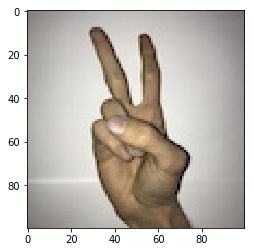

In [16]:
X_data = images_all
Y_data = label_data_all


index = 500
plt.imshow(X_data[index])

print(np.amax(X_data[0]))
print(len(X_data))
print(np.shape(X_data))
print(np.shape(Y_data))
print("Y_data = ", Y_data[index, :])
print("Y_data = ", label_data_integer(Y_data, index))

(1856, 100, 100, 3)
(1856, 6)
Y_random_data =  [0. 0. 0. 1. 0. 0.]
Y_random_data =  3
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


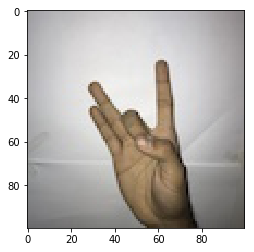

In [17]:
# Generating random order of data(X_data) and related labels(Y_data)

idx = np.random.permutation(len(X_data))
X_random_data, Y_random_data = X_data[idx], Y_data[idx]

index = 500
plt.imshow(X_random_data[index])

print(np.shape(X_random_data))
print(np.shape(Y_random_data))
print("Y_random_data = ", Y_random_data[index, :])
print("Y_random_data = ", label_data_integer(Y_random_data, index))
print(type(X_random_data))
print(type(Y_random_data))


(1186, 100, 100, 3)
(1186, 6)
(335, 100, 100, 3)
(335, 6)
(335, 100, 100, 3)
(335, 6)
Y_cv =  4


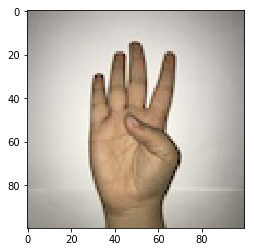

In [22]:
# Dividing data into train, validation and test sets. 18% and 22% done to make the validation and test
# sizes equal

import sklearn.model_selection as sk

X_train_cv, X_test, Y_train_cv, Y_test = sk.train_test_split(X_random_data, Y_random_data, test_size = 0.18, random_state=42)

X_train, X_cv, Y_train, Y_cv = sk.train_test_split(X_train_cv, Y_train_cv, test_size = 0.22, random_state=42)

print(np.shape(X_train))
print(np.shape(Y_train))
print(np.shape(X_cv))
print(np.shape(Y_cv))
print(np.shape(X_test))
print(np.shape(Y_test))

index1 = 0
plt.imshow(X_train[index1])


index2 = 300
#plt.imshow(X_cv[index2])
#plt.imshow(X_test[index2])

#print("Y_train = ", label_data_integer(Y_train, index1))
print("Y_cv = ", label_data_integer(Y_train, index1))
#print("Y_test = ", label_data_integer(Y_test, index2))


[[[131 127 124]
  [134 130 127]
  [136 132 129]
  ...
  [126 122 121]
  [124 120 119]
  [123 119 118]]

 [[133 129 126]
  [135 131 128]
  [138 134 131]
  ...
  [128 124 123]
  [126 122 121]
  [125 121 120]]

 [[135 131 128]
  [137 133 130]
  [140 136 133]
  ...
  [128 124 123]
  [126 122 121]
  [125 121 120]]

 ...

 [[144 141 136]
  [147 144 139]
  [149 146 141]
  ...
  [121 118 113]
  [119 116 111]
  [117 114 109]]

 [[141 138 133]
  [144 141 136]
  [147 144 139]
  ...
  [120 117 112]
  [118 115 110]
  [117 114 109]]

 [[139 136 131]
  [142 139 134]
  [145 142 137]
  ...
  [120 117 112]
  [119 116 111]
  [118 115 110]]]


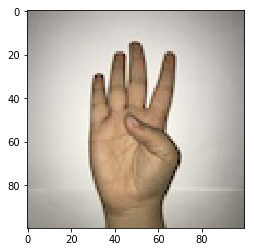

In [23]:
# Normalising X_data

X_train_norm = np.true_divide(X_train, 255)
X_cv_norm = np.true_divide(X_cv, 255)
X_test_norm = np.true_divide(X_test, 255)

index1 = 0
plt.imshow(X_train[index1])
print(X_train[0])

[[[0.51372549 0.49803922 0.48627451]
  [0.5254902  0.50980392 0.49803922]
  [0.53333333 0.51764706 0.50588235]
  ...
  [0.49411765 0.47843137 0.4745098 ]
  [0.48627451 0.47058824 0.46666667]
  [0.48235294 0.46666667 0.4627451 ]]

 [[0.52156863 0.50588235 0.49411765]
  [0.52941176 0.51372549 0.50196078]
  [0.54117647 0.5254902  0.51372549]
  ...
  [0.50196078 0.48627451 0.48235294]
  [0.49411765 0.47843137 0.4745098 ]
  [0.49019608 0.4745098  0.47058824]]

 [[0.52941176 0.51372549 0.50196078]
  [0.5372549  0.52156863 0.50980392]
  [0.54901961 0.53333333 0.52156863]
  ...
  [0.50196078 0.48627451 0.48235294]
  [0.49411765 0.47843137 0.4745098 ]
  [0.49019608 0.4745098  0.47058824]]

 ...

 [[0.56470588 0.55294118 0.53333333]
  [0.57647059 0.56470588 0.54509804]
  [0.58431373 0.57254902 0.55294118]
  ...
  [0.4745098  0.4627451  0.44313725]
  [0.46666667 0.45490196 0.43529412]
  [0.45882353 0.44705882 0.42745098]]

 [[0.55294118 0.54117647 0.52156863]
  [0.56470588 0.55294118 0.53333333]


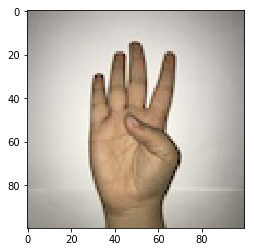

In [27]:
index1 = 0
plt.imshow(X_train_norm[index1])
print(X_train_norm[0])

In [28]:
# TensorFlow requires that you Create Placeholders for the input data that will be fed into the model when 
# running the session.

def create_placeholders(n_H0, n_W0, n_C0, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_H0 -- scalar, height of an input image
    n_W0 -- scalar, width of an input image
    n_C0 -- scalar, number of channels of the input
    n_y -- scalar, number of classes
        
    Returns:
    X -- placeholder for the data input, of shape [None, n_H0, n_W0, n_C0] and dtype "float". 'None' denotes batch
    size, which is kept flexible, intentionally
    Y -- placeholder for the input labels, of shape [None, n_y] and dtype "float"
    """

    X = tf.placeholder(tf.float32, [None, n_H0, n_W0, n_C0])
    Y = tf.placeholder(tf.float32, [None, n_y])
    
    return X, Y

In [29]:
# Eventhough input is 2D ex) 20x14
# output-shape is not 2D , but 1D Matrix
# because filter height = L must be matched with input height = L
# 1-direction (x) to calcuate conv! not 2D
# input = [W,L], filter = [k,L] output = [W]
# output-shape is 1D Matrix
# what if we want to train N filters (N is number of filters)
# then output shape is (stacked 1D) 2D = 1D x N matrix.


In [30]:
# Initialize Parameters : You don't need to worry about bias variables as you will soon see that TensorFlow
# functions take care of the bias. Note also that you will only initialize the weights/filters for the conv2d 
# functions. TensorFlow initializes the layers for the fully connected part automatically. We will talk more 
# about that later in this assignment.


def initialize_parameters():
    """
    Initializes weight parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [4, 4, 3, 8] - Assumed shape
                        W2 : [2, 2, 8, 16] - Assumed shape
    Returns:
    parameters -- a dictionary of tensors containing W1, W2
    """
    
    W1 = tf.get_variable("W1", [4, 4, 3, 8], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W2 = tf.get_variable("W2", [2, 2, 8, 16], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    

    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters


In [31]:
# Forward Propagation : In TensorFlow, there are built-in functions that carry out the convolution steps for you.

# tf.nn.conv2d(X,W1, strides = [1,s,s,1], padding = 'SAME'): given an input X and a group of filters W1, this
# function convolves W1's filters on X. The third input ([1,f,f,1]) represents the strides for each dimension
# of the input (m, n_H_prev, n_W_prev, n_C_prev).

# tf.nn.max_pool(A, ksize = [1,f,f,1], strides = [1,s,s,1], padding = 'SAME'): given an input A, this function
# uses a window of size (f, f) and strides of size (s, s) to carry out max pooling over each window.

# tf.nn.relu(Z1): computes the elementwise ReLU of Z1 (which can be any shape).

# tf.contrib.layers.flatten(P): given an input P, this function flattens each example into a 1D vector it while
# maintaining the batch-size. It returns a flattened tensor with shape [batch_size, k].

# tf.contrib.layers.fully_connected(F, num_outputs): given a the flattened input F, it returns the output
# computed using a fully connected layer.

# In the last function above (tf.contrib.layers.fully_connected), the fully connected layer automatically 
# initializes weights in the graph and keeps on training them as you train the model. Hence, you did not need
# to initialize those weights when initializing the parameters.

# Implement the forward_propagation function below to build the following model: CONV2D -> RELU -> MAXPOOL -> 
#                   CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED. You should use the functions above.

# In detail, we will use the following parameters for all the steps:

# - Conv2D: stride 1, padding is "SAME"
# - ReLU
# - Max pool: Use an 8 by 8 filter size and an 8 by 8 stride, padding is "SAME"
# - Conv2D: stride 1, padding is "SAME"
# - ReLU
# - Max pool: Use a 4 by 4 filter size and a 4 by 4 stride, padding is "SAME"
# - Flatten the previous output.
# - FULLYCONNECTED (FC) layer: Apply a fully connected layer without an non-linear activation function. Do not
# call the softmax here. This will result in 6 neurons in the output layer, which then get passed later to a
# softmax. In TensorFlow, the softmax and cost function are lumped together into a single function, which you'll
# call in a different function when computing the cost.


In [32]:
# Forward Propagation

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "W2"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    # CONV2D: stride of 1, padding 'SAME'
    Z1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
    # RELU
    A1 = tf.nn.relu(Z1)
    # MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tf.nn.max_pool(A1, ksize = [1, 8, 8, 1], strides = [1, 8, 8, 1], padding='SAME')
    # CONV2D: filters W2, stride 1, padding 'SAME'
    Z2 = tf.nn.conv2d(P1, W2, strides=[1, 1, 1, 1], padding='SAME')
    # RELU
    A2 = tf.nn.relu(Z2)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.nn.max_pool(A2, ksize = [1, 4, 4, 1], strides = [1, 4, 4, 1], padding='SAME')
    # FLATTEN
    P = tf.contrib.layers.flatten(P2)
    # FULLY-CONNECTED without non-linear activation function (not not call softmax).
    # 6 neurons in output layer. Hint: one of the arguments should be "activation_fn=None" 
    Z3 = tf.contrib.layers.fully_connected(P, 6, activation_fn=None)
    
    return Z3

In [33]:
# Implement the compute cost function below. You might find these two functions helpful:

# tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y): computes the softmax entropy loss. This 
# function both computes the softmax activation function as well as the resulting loss.
# tf.reduce_mean: computes the mean of elements across dimensions of a tensor. Use this to sum the losses over
# all the examples to get the overall cost.

In [34]:
# Compute Cost 

def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Z3, labels=Y))
    
    return cost

In [35]:
# Creating Mini Batches

def mini_batches(X, Y, mini_batch_size = 64):
    
    m = (np.shape(X)[0])
    mini_batches_X = []
    mini_batches_Y = []
    
    num_minibatches =math.floor(m/mini_batch_size)
    if m % mini_batch_size != 0:
        num_minibatches = num_minibatches + 1
        
    mini_batches_X = np.array_split(X, num_minibatches)
    mini_batches_Y = np.array_split(Y, num_minibatches)
    
    return mini_batches_X, mini_batches_Y, num_minibatches

In [36]:
mini_batches_X, mini_batches_Y, num_minibatches = mini_batches(X_train_norm, Y_train, mini_batch_size = 64)

print(num_minibatches)
print(np.shape(mini_batches_X[0]))
print(np.shape(mini_batches_Y[0]))
print(np.shape(mini_batches_X[1]))
print(np.shape(mini_batches_Y[1]))
print(np.shape(mini_batches_X[num_minibatches -1]))
print(np.shape(mini_batches_Y[num_minibatches -1]))

19
(63, 100, 100, 3)
(63, 6)
(63, 100, 100, 3)
(63, 6)
(62, 100, 100, 3)
(62, 6)


19
(63, 100, 100, 3)
(63, 6)
(63, 100, 100, 3)
(63, 6)
(62, 100, 100, 3)
(62, 6)
Y_train =  3


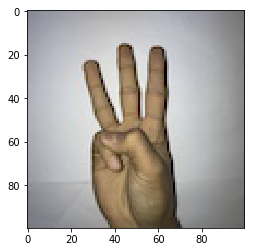

In [37]:
mini_batches_XX, mini_batches_YY, num_minibatches_new = mini_batches(X_train, Y_train, mini_batch_size = 64)

print(num_minibatches_new)
print(np.shape(mini_batches_XX[0]))
print(np.shape(mini_batches_YY[0]))
print(np.shape(mini_batches_XX[1]))
print(np.shape(mini_batches_YY[1]))
print(np.shape(mini_batches_X[num_minibatches_new -1]))
print(np.shape(mini_batches_Y[num_minibatches_new -1]))

index3 = 0
index4 = 62
plt.imshow((mini_batches_XX[index3])[index4])

#print("Y_train = ", label_data_integer(Y_train, index1))
print("Y_train = ", label_data_integer(mini_batches_YY[index3], index4))
#print("Y_test = ", label_data_integer(Y_test, index2))


In [57]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_cv, Y_cv, X_test, Y_test, learning_rate=0.045,
          num_epochs=100, minibatch_size=64, print_cost=True):
    """
    Implements a three-layer ConvNet in Tensorflow:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X_train -- training set, of shape (None, 100, 100, 3)
    Y_train -- test set, of shape (None, n_y = 6)
    X_test -- training set, of shape (None, 100, 100, 3)
    Y_test -- test set, of shape (None, n_y = 6)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    train_accuracy -- real number, accuracy on the train set (X_train)
    test_accuracy -- real number, testing accuracy on the test set (X_test)
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
##    tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
##    seed = 3                                          # to keep results consistent (numpy seed)
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of the correct shape
    
    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)
    

    # Initialize parameters
    
    parameters = initialize_parameters()
       
    # Forward propagation: Build the forward propagation in the tensorflow graph
    
    Z3 = forward_propagation(X, parameters)
    
    # Cost function: Add cost function to tensorflow graph
    
    cost = compute_cost(Z3, Y)
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer that minimizes the cost.
    
##    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    optimizer = tf.train.AdamOptimizer().minimize(cost)
##    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    
    # Initialize all the variables globally
    init = tf.global_variables_initializer()
     
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            minibatch_cost = 0.
##            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
##            seed = seed + 1
##            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            mini_batches_X, mini_batches_Y, num_minibatches = mini_batches(X_train, Y_train, minibatch_size)

##            for minibatch in minibatches:

                # Select a minibatch
##                (minibatch_X, minibatch_Y) = minibatch
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y   
            for i in range(num_minibatches):
                
                _ , temp_cost = sess.run([optimizer, cost], feed_dict={X:mini_batches_X[i], Y:mini_batches_Y[i]})
                
                
                minibatch_cost += temp_cost / num_minibatches
                

            # Print the cost every epoch
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
        
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # Calculate the correct predictions
        predict_op = tf.argmax(Z3, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        cv_accuracy = accuracy.eval({X: X_cv, Y: Y_cv})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        
        print("Train Accuracy:", train_accuracy)
        print("cv_accuracy:", cv_accuracy)
        print("Test Accuracy:", test_accuracy)
                
        return train_accuracy, cv_accuracy, test_accuracy, parameters


Cost after epoch 0: 1.667745
Cost after epoch 5: 1.499757
Cost after epoch 10: 0.941554
Cost after epoch 15: 0.665149
Cost after epoch 20: 0.563900
Cost after epoch 25: 0.493532
Cost after epoch 30: 0.434170
Cost after epoch 35: 0.382508
Cost after epoch 40: 0.336968
Cost after epoch 45: 0.298758
Cost after epoch 50: 0.265603
Cost after epoch 55: 0.238980
Cost after epoch 60: 0.215245
Cost after epoch 65: 0.195621
Cost after epoch 70: 0.177723
Cost after epoch 75: 0.162614
Cost after epoch 80: 0.149554
Cost after epoch 85: 0.139350
Cost after epoch 90: 0.129790
Cost after epoch 95: 0.121270


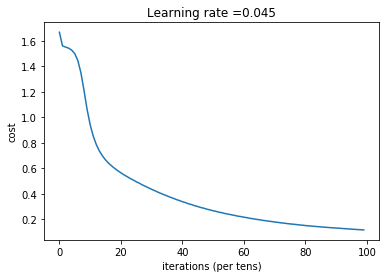

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.96543
cv_accuracy: 0.8686567
Test Accuracy: 0.9104478


In [58]:
_, _,_, parameters = model(X_train_norm, Y_train, X_cv_norm, Y_cv, X_test_norm, Y_test)
